In [1]:
import os
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

For merging the files

In [6]:
csv_list = os.listdir("./Hard Disk Drive - Data Mining - Data Folder/data_Q1_2016")
 
fout=open("./Hard Disk Drive - Data Mining - Data Folder/outfile_2016_Q1_new.csv", "a")

print(csv_list[0])
for line in open("./Hard Disk Drive - Data Mining - Data Folder/data_Q1_2016/" + csv_list[0]):
    fout.write(line)
    break
    
for csv in csv_list:
    f = open("./Hard Disk Drive - Data Mining - Data Folder/data_Q1_2016/" + csv)
    f.readline()
    for line in f:
        fout.write(line)
    f.close()
fout.close()

2016-01-01.csv
date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,smart_5_normalized,smart_5_raw,smart_7_normalized,smart_7_raw,smart_8_normalized,smart_8_raw,smart_9_normalized,smart_9_raw,smart_10_normalized,smart_10_raw,smart_11_normalized,smart_11_raw,smart_12_normalized,smart_12_raw,smart_13_normalized,smart_13_raw,smart_15_normalized,smart_15_raw,smart_22_normalized,smart_22_raw,smart_183_normalized,smart_183_raw,smart_184_normalized,smart_184_raw,smart_187_normalized,smart_187_raw,smart_188_normalized,smart_188_raw,smart_189_normalized,smart_189_raw,smart_190_normalized,smart_190_raw,smart_191_normalized,smart_191_raw,smart_192_normalized,smart_192_raw,smart_193_normalized,smart_193_raw,smart_194_normalized,smart_194_raw,smart_195_normalized,smart_195_raw,smart_196_normalized,smart_196_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,s

Pick the file and do the transformation

In [2]:
df = pd.read_csv("./Hard Disk Drive_Data Mining_Data Folder/outfile_2016_Q1.csv")#,  nrows=1000)#'harddrive.csv')

IOError: File ./Hard Disk Drive - Data Mining - Data Folder/outfile_2016_Q1.csv does not exist

In [13]:
df.head()

,Unnamed: 0,MJ0351YNG9Z0XA,Hitachi HDS5C3030ALA630,3000592982016,0,100,0.1,135,108,143,...,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94
0,2016-04-01,Z305B2QN,ST4000DM000,4000787030016,0,117,140875840,NaN,NaN,95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-04-01,MJ0351YNG9Z7LA,Hitachi HDS5C3030ALA630,3000592982016,0,100,0,136.0,104.0,123,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-04-01,MJ0351YNGABYAA,Hitachi HDS5C3030ALA630,3000592982016,0,100,0,136.0,104.0,137,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-04-01,WD-WMC4N2899475,WDC WD30EFRX,3000592982016,0,200,0,NaN,NaN,175,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-04-01,Z305DTP7,ST4000DM000,4000787030016,0,117,118868640,NaN,NaN,94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df['capacity_bytes'] = df['capacity_bytes']/(1024*4)
df.head()

KeyError: 'capacity_bytes'

In [ ]:
print(df.groupby('model')['failure'].sum().sort_values(ascending=False).iloc[:30])

In [5]:
df['Brands'] = " "
df['Brands'][((df['model'].str.contains("ST")==True) & (df['model'].str.contains("HGST")==False))] = "Seagate"
df['Brands'][df['model'].str.contains("HGST")] = "HGST"
df['Brands'][df['model'].str.contains("Hitachi")] = "Hitachi"
df['Brands'][df['model'].str.contains("Toshiba" or "TOSHIBA")] = "Toshiba"
df['Brands'][df['model'].str.contains("WDC")] = "Western Digital"
df['Brands'][df['model'].str.contains("SAMSUNG")] = "Samsung"

C:\Users\lavle\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\lavle\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lavle\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\lavle\Anaconda3\lib\

In [6]:
df.head()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw,Brands
0,2016-01-01,MJ0351YNG9Z0XA,Hitachi HDS5C3030ALA630,732566646.0,0,100.0,0.0,135.0,108.0,143.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hitachi
1,2016-01-01,Z305B2QN,ST4000DM000,976754646.0,0,113.0,54551400.0,NaN,NaN,96.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Seagate
2,2016-01-01,MJ0351YNG9Z7LA,Hitachi HDS5C3030ALA630,732566646.0,0,100.0,0.0,136.0,104.0,124.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hitachi
3,2016-01-01,MJ0351YNGABYAA,Hitachi HDS5C3030ALA630,732566646.0,0,100.0,0.0,136.0,104.0,137.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hitachi
4,2016-01-01,WD-WMC4N2899475,WDC WD30EFRX,732566646.0,0,200.0,0.0,NaN,NaN,175.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Western Digital


In [7]:
df['model'].isnull().sum()

0

In [38]:
df_temp = df[["date", "serial_number", "model", "failure", "capacity_bytes",
                  "smart_2_normalized", "smart_2_raw",
                 "smart_5_normalized", "smart_5_raw",
                 "smart_9_normalized", "smart_9_raw",
                 "smart_187_normalized", "smart_187_raw",
                 "smart_188_normalized", "smart_188_raw",
                 "smart_192_normalized", "smart_192_raw",
                 "smart_194_normalized", "smart_194_raw",
                 "smart_197_normalized", "smart_197_raw",
                 "smart_198_normalized", "smart_198_raw",
                 "Brands"]]

In [2]:
#Work directly with transformed file
df_temp = pd.read_csv("./HardDiskDrive_DataMining_DataFolder/transformed_2016_Q1.csv")

Checking the number of hard drives for each model

In [3]:
df_temp.groupby('model')['failure'].count().sort_values(ascending=False)

model
ST4000DM000                2883058
HGST HMS5C4040ALE640        644193
Hitachi HDS5C3030ALA630     414671
Hitachi HDS722020ALA330     403606
HGST HMS5C4040BLE640        281281
Hitachi HDS5C4040ALE630     239823
ST6000DX000                 171262
WDC WD30EFRX                 95434
Hitachi HDS723030ALA640      90921
ST500LM012 HN                51349
WDC WD60EFRX                 41678
WDC WD5000LPVX               25389
ST4000DX000                  19157
TOSHIBA MD04ABA400V          13254
WDC WD20EFRX                 11744
WDC WD1600AAJS                8999
HGST HDS5C4040ALE630          6194
ST31500541AS                  6006
ST320LT007                    5354
ST3160316AS                   4675
ST9250315AS                   4540
TOSHIBA DT01ACA300            4277
WDC WD40EFRX                  4186
ST3160318AS                   4151
HGST HUH728080ALE600          4095
TOSHIBA MD04ABA500V           4095
HGST HDS724040ALE640          3640
WDC WD10EADS                  3528
ST250LM004 HN 

We have a very imbalanced number of hard drives with respect to models here.

In [4]:
#Total number of hard drives for each manufacturer
df_temp.groupby('Brands')['model'].count().sort_values()

Brands
Samsung                  5
Toshiba              21626
Western Digital     200458
HGST                939403
Hitachi            1151007
Seagate            3155389
Name: model, dtype: int64

In [5]:
#Failure count for each manufacturer
df_temp.groupby('Brands')['failure'].sum().sort_values()

Brands
Samsung              0
Toshiba              1
HGST                10
Hitachi             37
Western Digital     44
Seagate            245
Name: failure, dtype: int64

In [6]:
#Failure count for each model
df_temp.groupby('model')['failure'].sum().sort_values(ascending=False)

model
ST4000DM000                200
ST320LT007                  31
Hitachi HDS722020ALA330     20
WDC WD30EFRX                10
HGST HMS5C4040ALE640        10
Hitachi HDS5C3030ALA630      8
Hitachi HDS5C4040ALE630      7
WDC WD10EADS                 6
WDC WD60EFRX                 6
ST4000DX000                  5
WDC WD20EFRX                 4
WDC WD800BB                  4
WDC WD800JB                  3
WDC WD1600AAJB               2
WDC WD5000LPVX               2
ST9250315AS                  2
ST500LM012 HN                2
Hitachi HDS723030ALA640      2
ST250LT007                   2
ST3160318AS                  2
TOSHIBA DT01ACA300           1
ST3160316AS                  1
WDC WD800JD                  1
WDC WD10EACS                 1
WDC WD800LB                  1
WDC WD3200BEKX               1
WDC WD800AAJB                1
WDC WD3200AAJB               1
WDC WD1600BPVT               1
SAMSUNG HD154UI              0
                          ... 
Hitachi HDT725025VLA380      0
ST

In [7]:
df_temp[df_temp['Brands'] == " "]

,Unnamed: 0,date,serial_number,model,failure,capacity_bytes,smart_2_normalized,smart_2_raw,smart_5_normalized,smart_5_raw,...,smart_188_raw,smart_192_normalized,smart_192_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,Brands


In [8]:
df_temp.groupby('serial_number')['failure'].sum().sort_values(ascending=False)

serial_number
W300BSKD           1
JK11A5B8KK8SKX     1
W0Q6GS3J           1
W300FQY9           1
Z300K9MG           1
W300BM8M           1
Z300W356           1
MJ1311YNG3AUYA     1
Z305G5Y9           1
Z300KCMM           1
Z3040DVP           1
Z300N1DZ           1
W0Q6JBDE           1
Z3029ZSA           1
MJ1311YNG2M29A     1
Z3025Z3Q           1
Z305D50W           1
WD-WMC4N2739798    1
WD-WX11D84JN1EP    1
S300Z61P           1
W300SR3X           1
W0Q51SKJ           1
W0Q6JFP6           1
W0Q24X20           1
W0Q1NBXA           1
Z1Z05HDV           1
PL1321LAG34N8H     1
Z302BMWF           1
W300935A           1
W0Q1YSGN           1
                  ..
Z3015MN9           0
Z3015LN8           0
Z3015MG2           0
Z3015MFY           0
Z3015MDZ           0
Z3015M98           0
Z3015M63           0
Z3015M0P           0
Z3015LY1           0
Z3015LWF           0
Z3015LWB           0
Z3015LW4           0
Z3015LVW           0
Z3015LVE           0
Z3015LVB           0
Z3015LV9           0

In [23]:
df_temp.describe()

,Unnamed: 0,failure,capacity_bytes,smart_2_normalized,smart_2_raw,smart_5_normalized,smart_5_raw,smart_9_normalized,smart_9_raw,smart_187_normalized,...,smart_188_normalized,smart_188_raw,smart_192_normalized,smart_192_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw
count,5.467888e+06,5.467888e+06,5.467888e+06,2.166267e+06,2.166267e+06,5.467865e+06,5.467865e+06,5.467865e+06,5.467865e+06,3.101231e+06,...,3.101231e+06,3.101231e+06,5.452042e+06,5.452042e+06,5.467774e+06,5.467774e+06,5.467865e+06,5.467865e+06,5.467865e+06,5.467865e+06
mean,2.733944e+06,6.163257e-05,9.121214e+08,1.283138e+02,7.414330e+01,1.051539e+02,2.327964e+00,9.219647e+01,1.586325e+04,9.996616e+01,...,1.000000e+02,1.388083e+08,1.048477e+02,1.693404e+02,1.021258e+02,2.773085e+01,1.051729e+02,7.625225e-02,1.017606e+02,7.154895e-02
std,1.578443e+06,7.850400e-03,2.195954e+08,2.464224e+01,4.598639e+01,2.387171e+01,1.811707e+02,8.328996e+00,1.254533e+04,7.371279e-01,...,1.967086e-03,2.390852e+10,2.308662e+01,5.080983e+02,9.062280e+01,4.989003e+00,2.385215e+01,1.076203e+01,1.585517e+01,1.075895e+01
min,0.000000e+00,0.000000e+00,-2.441406e-04,1.000000e+02,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,...,9.800000e+01,0.000000e+00,4.600000e+01,0.000000e+00,1.300000e+01,1.300000e+01,8.100000e+01,0.000000e+00,8.100000e+01,0.000000e+00
25%,1.366972e+06,0.000000e+00,9.767546e+08,1.000000e+02,0.000000e+00,1.000000e+02,0.000000e+00,9.000000e+01,5.775000e+03,1.000000e+02,...,1.000000e+02,0.000000e+00,1.000000e+02,0.000000e+00,2.600000e+01,2.400000e+01,1.000000e+02,0.000000e+00,1.000000e+02,0.000000e+00
50%,2.733944e+06,0.000000e+00,9.767546e+08,1.330000e+02,1.000000e+02,1.000000e+02,0.000000e+00,9.500000e+01,1.351500e+04,1.000000e+02,...,1.000000e+02,0.000000e+00,1.000000e+02,3.000000e+00,3.400000e+01,2.700000e+01,1.000000e+02,0.000000e+00,1.000000e+02,0.000000e+00
75%,4.100915e+06,0.000000e+00,9.767546e+08,1.340000e+02,1.040000e+02,1.000000e+02,0.000000e+00,9.800000e+01,2.196800e+04,1.000000e+02,...,1.000000e+02,0.000000e+00,1.000000e+02,9.600000e+01,2.060000e+02,3.100000e+01,1.000000e+02,0.000000e+00,1.000000e+02,0.000000e+00
max,5.467887e+06,1.000000e+00,1.953507e+09,2.520000e+02,1.960000e+02,2.520000e+02,5.470400e+04,2.520000e+02,9.047700e+04,1.000000e+02,...,1.000000e+02,8.933668e+12,2.520000e+02,6.553500e+04,2.530000e+02,4.600000e+01,2.520000e+02,3.128000e+03,2.520000e+02,3.128000e+03


Let's check how many null values are present in the data

In [9]:
df_temp.isnull().sum()

Unnamed: 0                    0
date                          0
serial_number                 0
model                         0
failure                       0
capacity_bytes                0
smart_2_normalized      3301621
smart_2_raw             3301621
smart_5_normalized           23
smart_5_raw                  23
smart_9_normalized           23
smart_9_raw                  23
smart_187_normalized    2366657
smart_187_raw           2366657
smart_188_normalized    2366657
smart_188_raw           2366657
smart_192_normalized      15846
smart_192_raw             15846
smart_194_normalized        114
smart_194_raw               114
smart_197_normalized         23
smart_197_raw                23
smart_198_normalized         23
smart_198_raw                23
Brands                        0
dtype: int64

In [29]:
#Total null in each column grouped by brands
label_cols = [   "smart_2_normalized",# "smart_2_raw",
                 "smart_5_normalized",# "smart_5_raw",
                 "smart_9_normalized",# "smart_9_raw",
                 "smart_187_normalized",# "smart_187_raw",
                 "smart_188_normalized",# "smart_188_raw",
                 "smart_192_normalized",# "smart_192_raw",
                 "smart_194_normalized",# "smart_194_raw",
                 "smart_197_normalized",# "smart_197_raw",
                 "smart_198_normalized",]# "smart_198_raw",]

for col in label_cols:
    print(col + ":")
    print(df_temp[col].isnull().groupby([df_temp['Brands']]).sum())
    print("\n")

smart_2_normalized:
Brands
HGST                     0.0
Hitachi                  0.0
Samsung                  5.0
Seagate            3101158.0
Toshiba                  0.0
Western Digital     200458.0
Name: smart_2_normalized, dtype: float64


smart_5_normalized:
Brands
HGST                0.0
Hitachi             0.0
Samsung             0.0
Seagate            23.0
Toshiba             0.0
Western Digital     0.0
Name: smart_5_normalized, dtype: float64


smart_9_normalized:
Brands
HGST                0.0
Hitachi             0.0
Samsung             0.0
Seagate            23.0
Toshiba             0.0
Western Digital     0.0
Name: smart_9_normalized, dtype: float64


smart_187_normalized:
Brands
HGST                939403.0
Hitachi            1151007.0
Samsung                  0.0
Seagate              54254.0
Toshiba              21626.0
Western Digital     200367.0
Name: smart_187_normalized, dtype: float64


smart_188_normalized:
Brands
HGST                939403.0
Hitachi            115

In [30]:
#Total number of hard drives for each manufacturer
df_temp.groupby('Brands')['model'].count().sort_values()

Brands
Samsung                  5
Toshiba              21626
Western Digital     200458
HGST                939403
Hitachi            1151007
Seagate            3155389
Name: model, dtype: int64

In [56]:
label_cols = [   "smart_2_normalized", "smart_2_raw",
                 "smart_5_normalized", "smart_5_raw",
                 "smart_9_normalized", "smart_9_raw",
                 "smart_187_normalized", "smart_187_raw",
                 "smart_188_normalized", "smart_188_raw",
                 "smart_192_normalized", "smart_192_raw",
                 "smart_194_normalized", "smart_194_raw",
                 "smart_197_normalized", "smart_197_raw",
                 "smart_198_normalized", "smart_198_raw",]
for col in label_cols:
    print(col + ":")
    print(df_temp.groupby('Brands')[col].mean())
    print("\n")

smart_2_normalized:
Brands
HGST               133.372277
Hitachi            118.750313
Samsung                   NaN
Seagate            252.000000
Toshiba            107.417553
Western Digital           NaN
Name: smart_2_normalized, dtype: float64


smart_2_raw:
Brands
HGST               102.851659
Hitachi             55.330591
Samsung                   NaN
Seagate              0.000000
Toshiba             14.294090
Western Digital           NaN
Name: smart_2_raw, dtype: float64


smart_5_normalized:
Brands
HGST                99.985817
Hitachi             99.925338
Samsung            100.000000
Seagate            102.609803
Toshiba            100.000000
Western Digital    199.996109
Name: smart_5_normalized, dtype: float64


smart_5_raw:
Brands
HGST                0.479803
Hitachi             2.729002
Samsung             0.000000
Seagate             2.478539
Toshiba            60.451679
Western Digital     0.045581
Name: smart_5_raw, dtype: float64


smart_9_normalized:
Brands
HGST   

In [37]:
#WDC WD1600AAJS
(df_temp.groupby('model')['smart_9_raw'].size())/(24)
374.958333/8999

model
HGST HDS5C4040ALE630          258.083333
HGST HDS724040ALE640          151.666667
HGST HMS5C4040ALE640        26841.375000
HGST HMS5C4040BLE640        11720.041667
HGST HUH728080ALE600          170.625000
Hitachi HDS5C3030ALA630     17277.958333
Hitachi HDS5C3030BLE630         3.791667
Hitachi HDS5C4040ALE630      9992.625000
Hitachi HDS722020ALA330     16816.916667
Hitachi HDS723020BLA642        29.666667
Hitachi HDS723030ALA640      3788.375000
Hitachi HDS723030BLE640        34.125000
Hitachi HDS724040ALE640        11.375000
Hitachi HDT725025VLA380         3.791667
SAMSUNG HD154UI                 0.208333
ST2000VN000                    22.750000
ST250LM004 HN                 120.083333
ST250LT007                     11.666667
ST31500341AS                    0.625000
ST31500541AS                  250.250000
ST3160316AS                   194.791667
ST3160318AS                   172.958333
ST320LT007                    223.083333
ST3500320AS                     3.791667
ST4000DM00

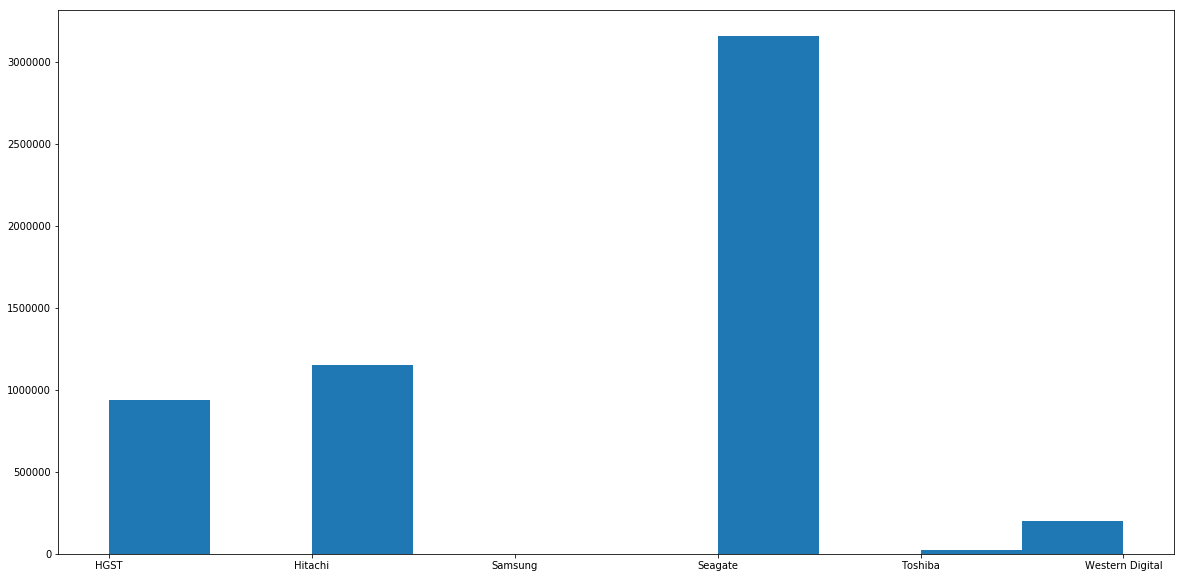

In [38]:
plt.figure(figsize=(20,10))
plt.hist(df_temp['Brands'])
plt.show()

In [3]:
df_temp.to_csv("./Hard Disk Drive_Data Mining_Data Folder/transformed_2016_Q1.csv")

NameError: name 'df_temp' is not defined

In [ ]:
df_temp.shape

In [58]:
failures = df_temp['failure'].sum()

In [59]:
total = df_temp['failure'].count()

In [60]:
daily_failure_rate = float(failures)/float(total)
daily_failure_rate

6.163257184492441e-05

In [61]:
quarter_failure_rate = daily_failure_rate*91*100
quarter_failure_rate

0.5608564037888122

In [15]:
brands = df_temp['Brands'].unique()
brands

array(['Hitachi', 'Seagate', 'Western Digital', 'HGST', 'Toshiba',
       'Samsung'], dtype=object)

In [11]:
for i in brands:
    print("Brand %s:" % i)
    fails = df_temp['failure'][df_temp['Brands'] == i].sum()
    print("FAILS: %s" % fails)
    total_each = df_temp['Brands'][df_temp['Brands'] == i].count()
    print("Total: %s" % total_each)
    failure_rate = (float(fails)/float(total_each))*100
    quarter_fail = failure_rate*91
    print("Daily Failure Rate: %s" % failure_rate)
    print("Quarterly failure rate: %s" % quarter_fail)
    print("\n")

Brand Hitachi:
FAILS: 37
Total: 1151007
Daily Failure Rate: 0.00321457645349
Quarterly failure rate: 0.292526457267


Brand Seagate:
FAILS: 245
Total: 3155389
Daily Failure Rate: 0.00776449433018
Quarterly failure rate: 0.706568984046


Brand Western Digital:
FAILS: 44
Total: 200458
Daily Failure Rate: 0.0219497351066
Quarterly failure rate: 1.9974258947


Brand HGST:
FAILS: 10
Total: 939403
Daily Failure Rate: 0.0010645058617
Quarterly failure rate: 0.0968700334148


Brand Toshiba:
FAILS: 1
Total: 21626
Daily Failure Rate: 0.00462406362712
Quarterly failure rate: 0.420789790068


Brand Samsung:
FAILS: 0
Total: 5
Daily Failure Rate: 0.0
Quarterly failure rate: 0.0




In [215]:
#*******Calculating Average life********
drive_age_years = (df_temp['smart_9_raw']/0.13)/(24*365)
drive_age_years.sort_values(ascending=False).reset_index()

,index,smart_9_raw
0,4473180,79.449420
1,4410858,79.427468
2,4348535,79.407271
3,4286212,79.386196
4,4223888,79.365999
5,4161565,79.344924
6,4099282,79.322972
7,4037008,79.302775
8,3974691,79.281700
9,3912407,79.260625


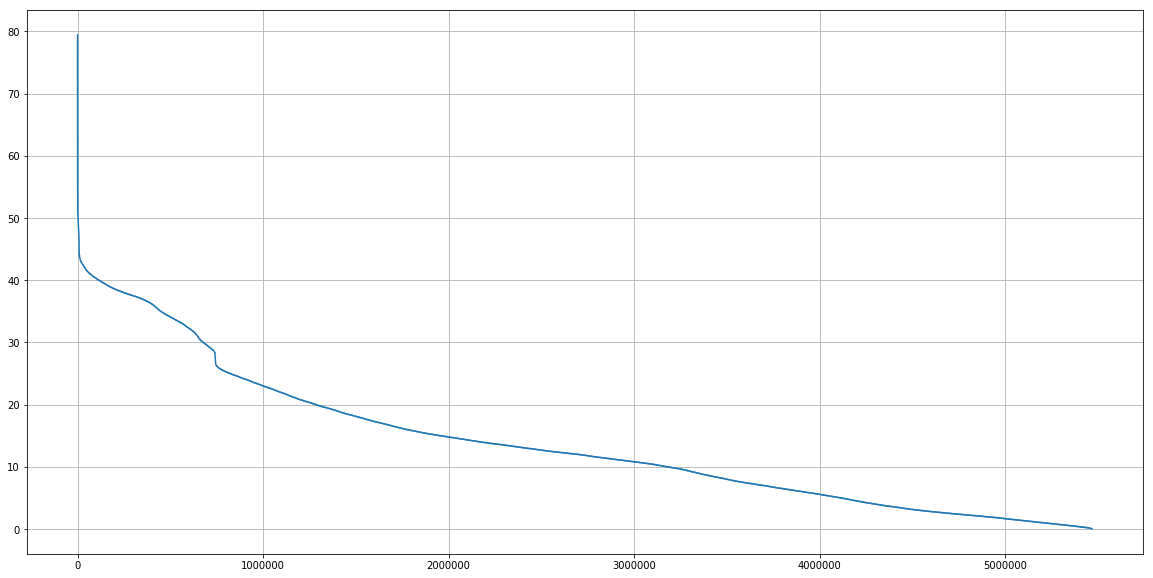

In [217]:
plt.figure(figsize = (20,10))
plt.plot(drive_age_years.dropna().sort_values(ascending=False).reset_index()['smart_9_raw'])
plt.grid()
plt.show()

In [23]:
fail_model_wise = df_temp.groupby('model')['failure'].sum()
fail_model_wise

model
HGST                    10
Hitachi                 37
Samsung                  0
Seagate                245
TOSHIBA DT01ACA300       1
TOSHIBA MD04ABA400V      0
TOSHIBA MD04ABA500V      0
Western Digital         44
Name: failure, dtype: int64

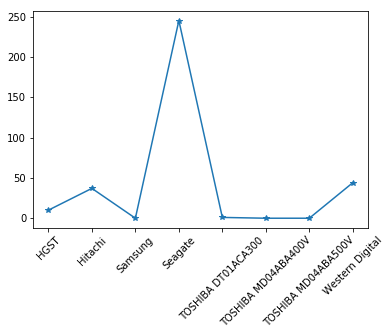

In [31]:
plt.plot(fail_model_wise, marker='*')
plt.xticks(rotation=45)
plt.show()

In [66]:
df_hgst = df_temp[df_temp['Brands'] == 'HGST']
df_hitachi = df_temp[df_temp['Brands'] == 'Hitachi']
df_samsumg = df_temp[df_temp['Brands'] == 'Samsung']
df_seagate = df_temp[df_temp['Brands'] == 'Seagate']
df_toshiba = df_temp[df_temp['Brands'] == 'Toshiba']
df_wd = df_temp[df_temp['Brands'] == 'Western Digital']

In [67]:
df_hgst.reset_index(inplace=True)
df_hitachi.reset_index(inplace=True)
df_samsumg.reset_index(inplace=True)
df_seagate.reset_index(inplace=True)
df_toshiba.reset_index(inplace=True)
df_wd.reset_index(inplace=True)

In [72]:
df_hitachi.drop(['index', 'Unnamed: 0'], axis=1)
df_samsumg.drop(['index', 'Unnamed: 0'], axis=1)
df_seagate.drop(['index', 'Unnamed: 0'], axis=1)
df_toshiba.drop(['index', 'Unnamed: 0'], axis=1)
df_wd.drop(['index', 'Unnamed: 0'], axis=1)

,date,serial_number,model,failure,capacity_bytes,smart_2_normalized,smart_2_raw,smart_5_normalized,smart_5_raw,smart_9_normalized,...,smart_188_raw,smart_192_normalized,smart_192_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,Brands
0,2016-01-01,WD-WMC4N2899475,WDC WD30EFRX,0,7.325666e+08,NaN,NaN,200.0,0.0,84.0,...,NaN,200.0,3.0,121.0,29.0,200.0,0.0,100.0,0.0,Western Digital
1,2016-01-01,WD-WMC4N0D3U99S,WDC WD30EFRX,0,7.325666e+08,NaN,NaN,200.0,0.0,93.0,...,NaN,200.0,0.0,122.0,28.0,200.0,0.0,100.0,0.0,Western Digital
2,2016-01-01,WD-WXL1H644SYHA,WDC WD60EFRX,0,1.465131e+09,NaN,NaN,200.0,0.0,88.0,...,NaN,200.0,0.0,123.0,29.0,200.0,0.0,100.0,0.0,Western Digital
3,2016-01-01,WD-WXG1EC3SFRL1,WDC WD5000LPVX,0,1.220966e+08,NaN,NaN,200.0,0.0,82.0,...,NaN,200.0,2.0,121.0,22.0,200.0,0.0,100.0,0.0,Western Digital
4,2016-01-01,WD-WCC4N0337188,WDC WD30EFRX,0,7.325666e+08,NaN,NaN,200.0,0.0,76.0,...,NaN,200.0,3.0,132.0,18.0,200.0,0.0,100.0,0.0,Western Digital
5,2016-01-01,WD-WMAYUU472236,WDC WD1600AAJS,0,3.907273e+07,NaN,NaN,200.0,0.0,68.0,...,NaN,200.0,33.0,116.0,27.0,200.0,0.0,200.0,0.0,Western Digital
6,2016-01-01,WD-WXK1H644HE27,WDC WD60EFRX,0,1.465131e+09,NaN,NaN,200.0,0.0,88.0,...,NaN,200.0,0.0,124.0,28.0,200.0,0.0,100.0,0.0,Western Digital
7,2016-01-01,WD-WX81A74A5KCF,WDC WD5000LPVX,0,1.220966e+08,NaN,NaN,200.0,0.0,87.0,...,NaN,200.0,0.0,121.0,22.0,200.0,0.0,100.0,0.0,Western Digital
8,2016-01-01,WD-WCC4N0933742,WDC WD30EFRX,0,7.325666e+08,NaN,NaN,200.0,0.0,81.0,...,NaN,200.0,25.0,127.0,23.0,200.0,0.0,100.0,0.0,Western Digital
9,2016-01-01,WD-WMAYV2811694,WDC WD1600AAJS,0,3.907273e+07,NaN,NaN,200.0,0.0,64.0,...,NaN,200.0,24.0,107.0,36.0,200.0,0.0,200.0,0.0,Western Digital


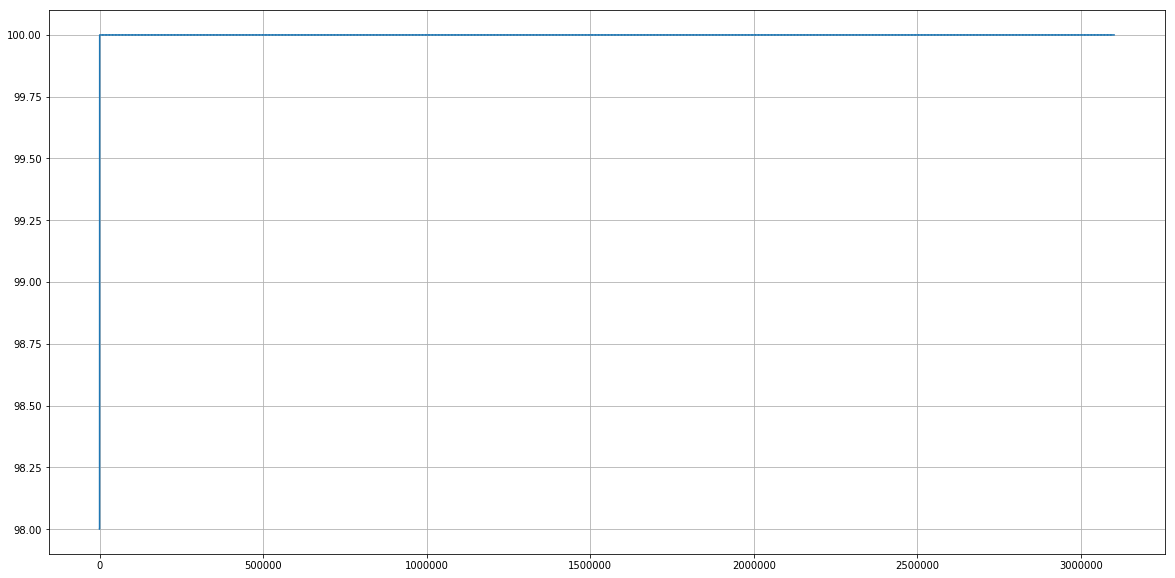

In [158]:
#*********Checking the outliers*********
plt.clf()
#df_wd.dropna().sort_values(by= ['smart_194_raw'])
plt.figure(figsize=(20,10))
#plt.rcParams['agg.path.chunksize'] = 10000
plt.plot(df_temp['smart_188_normalized'].dropna().sort_values().reset_index()['smart_188_normalized'])
plt.grid()
plt.show()

In [172]:
df_temp['smart_188_raw'].dropna().sort_values().reset_index()['smart_188_raw']# != 0).sum()

0          0.000000e+00
1          0.000000e+00
2          0.000000e+00
3          0.000000e+00
4          0.000000e+00
5          0.000000e+00
6          0.000000e+00
7          0.000000e+00
8          0.000000e+00
9          0.000000e+00
10         0.000000e+00
11         0.000000e+00
12         0.000000e+00
13         0.000000e+00
14         0.000000e+00
15         0.000000e+00
16         0.000000e+00
17         0.000000e+00
18         0.000000e+00
19         0.000000e+00
20         0.000000e+00
21         0.000000e+00
22         0.000000e+00
23         0.000000e+00
24         0.000000e+00
25         0.000000e+00
26         0.000000e+00
27         0.000000e+00
28         0.000000e+00
29         0.000000e+00
               ...     
3101201    3.564877e+12
3101202    3.564877e+12
3101203    3.564877e+12
3101204    3.564877e+12
3101205    3.564877e+12
3101206    3.564877e+12
3101207    3.564877e+12
3101208    3.564877e+12
3101209    3.564877e+12
3101210    3.564877e+12
3101211    3.564

In [155]:
df_t = df_wd['smart_194_raw'].dropna(inplace=True).sort_values(inplace=True)
df_t

C:\Users\lavle\Anaconda3\lib\site-packages\pandas\core\series.py:2993: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)


AttributeError: 'NoneType' object has no attribute 'sort_values'

In [194]:
df_t = df_wd[df_wd['smart_188_raw'] != 0]
df_t1 = df_t[df_wd['smart_188_raw'] != np.nan]
df_t2 = df_t[df_wd['failure'] == 1]

In [195]:
df_t2

,index,Unnamed: 0,date,serial_number,model,failure,capacity_bytes,smart_2_normalized,smart_2_raw,smart_5_normalized,...,smart_188_raw,smart_192_normalized,smart_192_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,Brands
1112,30285,30285,2016-01-01,WD-WCC4MKDL77ZK,WDC WD20EFRX,1,4.883786e+08,NaN,NaN,200.0,...,NaN,200.0,2.0,120.0,27.0,200.0,0.0,100.0,0.0,Western Digital
4465,120335,120335,2016-01-03,WD-WCC4M3TTXF1Y,WDC WD20EFRX,1,4.883786e+08,NaN,NaN,200.0,...,NaN,200.0,0.0,128.0,19.0,200.0,1.0,100.0,0.0,Western Digital
8693,234111,234111,2016-01-05,WD-WX11D84JN1EP,WDC WD60EFRX,1,1.465131e+09,NaN,NaN,200.0,...,NaN,200.0,0.0,125.0,27.0,200.0,0.0,100.0,0.0,Western Digital
10186,273338,273338,2016-01-05,WD-WCAV39016131,WDC WD800AAJB,1,1.953769e+07,NaN,NaN,200.0,...,NaN,200.0,26.0,101.0,42.0,200.0,0.0,100.0,0.0,Western Digital
34917,936859,936859,2016-01-17,WD-WMC4N1316862,WDC WD30EFRX,1,7.325666e+08,NaN,NaN,200.0,...,NaN,200.0,0.0,132.0,18.0,200.0,4.0,100.0,0.0,Western Digital
39906,1068821,1068821,2016-01-19,WD-WCAU45178029,WDC WD10EADS,1,2.441906e+08,NaN,NaN,199.0,...,NaN,200.0,628.0,123.0,27.0,200.0,0.0,200.0,0.0,Western Digital
56143,1500617,1500617,2016-01-27,WD-WMC4M2889605,WDC WD20EFRX,1,4.883786e+08,NaN,NaN,200.0,...,NaN,200.0,1.0,125.0,22.0,200.0,0.0,100.0,0.0,Western Digital
58161,1554843,1554843,2016-01-27,WD-WX61E82AXE53,WDC WD1600BPVT,1,3.907273e+07,NaN,NaN,200.0,...,NaN,200.0,10.0,115.0,28.0,200.0,0.0,100.0,0.0,Western Digital
65213,1745916,1745916,2016-01-31,WD-WCC4M7UYXP88,WDC WD20EFRX,1,4.883786e+08,NaN,NaN,200.0,...,NaN,200.0,0.0,126.0,21.0,200.0,2.0,100.0,0.0,Western Digital
74042,1986978,1986978,2016-02-04,WD-WMC4N2527183,WDC WD30EFRX,1,7.325666e+08,NaN,NaN,200.0,...,NaN,200.0,1.0,124.0,26.0,200.0,0.0,100.0,0.0,Western Digital
